# 405 Prepare equity input
We need the following variables at the R10 level:
* Emissions|CO2|Energy and Industrial Processes
* Carbon Sequestration|CCS|Biomass
* Carbon Sequestration|Direct Air Capture
* Population

We then want to aggregate the novel carbon removal at the R10 level.

We then append the global information for:
* Carbon Dioxide Removal|Novel
* Carbon Dioxide Removal|Novel [p90]

In [1]:
IPCC_IMP = [
    ('REMIND-MAgPIE 2.1-4.2','SusDev_SDP-PkBudg1000'),
    #('REMIND-MAgPIE 2.1-4.3','DeepElec_SSP2_ HighRE_Budg900')
    ('REMIND-MAgPIE 2.1-4.2', 'CEMICS_SSP1-1p5C-fullCDR'),
    ('REMIND-MAgPIE 2.1-4.2',	'CEMICS_SSP1-1p5C-minCDR'),
    ('REMIND-MAgPIE 2.1-4.2',	'CEMICS_SSP2-1p5C-fullCDR'),
    ('REMIND-MAgPIE 2.1-4.2',	'CEMICS_SSP2-1p5C-minCDR'),
]

In [2]:
import pyam
import pandas as pd
import numpy as np

import os
import dotenv
from pathlib import Path

<IPython.core.display.Javascript object>

In [3]:
dotenv.load_dotenv()

True

Step 1: Read in and downselect the AR6 R10 data.

In [4]:
variables = [
    'Emissions|CO2|Energy and Industrial Processes',
    'Carbon Sequestration|CCS|Biomass',
    'Carbon Sequestration|Direct Air Capture',
    'Carbon Sequestration|Enhanced Weathering',
    'Population'
]

In [5]:
df_r10 = pd.read_csv(
    os.environ['AR6_R10'],
    index_col=[0,1]
)

In [6]:
df_r10_imp = df_r10.loc[IPCC_IMP, :]

In [7]:
df_r10_imp = df_r10_imp[
    df_r10_imp['Variable'].isin(variables)
]

In [8]:
df_r10_imp_pyam = pyam.IamDataFrame(df_r10_imp)

Step 2: Interpolate and then aggregate the variables.

In [9]:
df_r10_imp_pyam.filter(
    year = range(2015, 2101),
    inplace=True
)

In [10]:
df_r10_imp_pyam.interpolate(
    time=range(2015, 2101),
    inplace=True
)

In [11]:
df_r10_imp_pyam.aggregate(
    variable='Carbon Dioxide Removal|Novel',
    components=[
        'Carbon Sequestration|CCS|Biomass',
        'Carbon Sequestration|Direct Air Capture',
        'Carbon Sequestration|Enhanced Weathering'
    ],
    append=True
)

Step 3: Read in the global carbon removal, filter, interpolate and append to the R10 data.

In [12]:
global_removal = pd.read_csv(
    Path('../data/100_novel_cdr.csv'),
    index_col=[0,1]
)

In [13]:
global_removal_imp = global_removal.loc[IPCC_IMP, :]

In [14]:
global_removal_imp

Region  \
Model                 Scenario                          
REMIND-MAgPIE 2.1-4.2 SusDev_SDP-PkBudg1000     World   
                      CEMICS_SSP1-1p5C-fullCDR  World   
                      CEMICS_SSP1-1p5C-minCDR   World   
                      CEMICS_SSP2-1p5C-fullCDR  World   
                      CEMICS_SSP2-1p5C-minCDR   World   

                                                                    Variable  \
Model                 Scenario                                                 
REMIND-MAgPIE 2.1-4.2 SusDev_SDP-PkBudg1000     Carbon Dioxide Removal|Novel   
                      CEMICS_SSP1-1p5C-fullCDR  Carbon Dioxide Removal|Novel   
                      CEMICS_SSP1-1p5C-minCDR   Carbon Dioxide Removal|Novel   
                      CEMICS_SSP2-1p5C-fullCDR  Carbon Dioxide Removal|Novel   
                      CEMICS_SSP2-1p5C-minCDR   Carbon Dioxide Removal|Novel   

                                                     Unit  2000  2005  2010  \
Model                 Scenario                                                
REMIND-MAgPIE 2.1-4.2 SusDev_SDP-PkBudg1000     Mt CO2/yr   NaN   0.0   0.0   
                      CEMICS_SSP1-1p5C-fullCDR  Mt CO2/yr   NaN   0.0   0.0   
                      CEMICS_SSP1-1p5C-minCDR   Mt CO2/yr   NaN   0.0   0.0   
                      CEMICS_SSP2-1p5C-fullCDR  Mt CO2/yr   NaN   0.0   0.0   
                      CEMICS_SSP2-1p5C-minCDR   Mt CO2/yr   NaN   0.0   0.0   

                                                2015    2020  2021  2022  ...  \
Model                 Scenario                                            ...   
REMIND-MAgPIE 2.1-4.2 SusDev_SDP-PkBudg1000      0.0  1.1654   NaN   NaN  ...   
                      CEMICS_SSP1-1p5C-fullCDR   0.0  0.0000   NaN   NaN  ...   
                      CEMICS_SSP1-1p5C-minCDR    0.0  0.0000   NaN   NaN  ...   
                      CEMICS_SSP2-1p5C-fullCDR   0.0  0.0000   NaN   NaN  ...   
                      CEMICS_SSP2-1p5C-minCDR    0.0  0.0000   NaN   NaN  ...   

                                                     2055       2060  2065  \
Model                 Scenario                                               
REMIND-MAgPIE 2.1-4.2 SusDev_SDP-PkBudg1000     1203.7248  1514.3918   NaN   
                      CEMICS_SSP1-1p5C-fullCDR  7086.2339  7205.2817   NaN   
                      CEMICS_SSP1-1p5C-minCDR    506.9816   497.7746   NaN   
                      CEMICS_SSP2-1p5C-fullCDR  9710.5275  9873.9972   NaN   
                      CEMICS_SSP2-1p5C-minCDR    510.7032   507.7371   NaN   

                                                     2070  2075       2080  \
Model                 Scenario                                               
REMIND-MAgPIE 2.1-4.2 SusDev_SDP-PkBudg1000     2037.7985   NaN  2333.4029   
                      CEMICS_SSP1-1p5C-fullCDR  7150.6393   NaN  6589.4458   
                      CEMICS_SSP1-1p5C-minCDR    433.6511   NaN   291.2006   
                      CEMICS_SSP2-1p5C-fullCDR  9931.3510   NaN  9722.6576   
                      CEMICS_SSP2-1p5C-minCDR    462.5692   NaN   385.2835   

                                                2085       2090  2095  \
Model                 Scenario                                          
REMIND-MAgPIE 2.1-4.2 SusDev_SDP-PkBudg1000      NaN  2412.0405   NaN   
                      CEMICS_SSP1-1p5C-fullCDR   NaN  6059.2223   NaN   
                      CEMICS_SSP1-1p5C-minCDR    NaN   345.4710   NaN   
                      CEMICS_SSP2-1p5C-fullCDR   NaN  9803.5786   NaN   
                      CEMICS_SSP2-1p5C-minCDR    NaN   433.2370   NaN   

                                                      2100  
Model                 Scenario                              
REMIND-MAgPIE 2.1-4.2 SusDev_SDP-PkBudg1000      2420.4740  
                      CEMICS_SSP1-1p5C-fullCDR   5693.6269  
                      CEMICS_SSP1-1p5C-minCDR     332.8551  
                      CEMICS_SSP2-1p5C-fullCDR  10259

In [15]:
df_r10_imp_pyam.filter(variable='Carbon Dioxide Removal|Novel').timeseries().groupby(['model', 'scenario']).sum()

2015     2016     2017  \
model                 scenario                                           
REMIND-MAgPIE 2.1-4.2 CEMICS_SSP1-1p5C-fullCDR   0.0  0.00000  0.00000   
                      CEMICS_SSP1-1p5C-minCDR    0.0  0.00000  0.00000   
                      CEMICS_SSP2-1p5C-fullCDR   0.0  0.00000  0.00000   
                      CEMICS_SSP2-1p5C-minCDR    0.0  0.00000  0.00000   
                      SusDev_SDP-PkBudg1000      0.0  0.23308  0.46616   

                                                   2018     2019    2020  \
model                 scenario                                             
REMIND-MAgPIE 2.1-4.2 CEMICS_SSP1-1p5C-fullCDR  0.00000  0.00000  0.0000   
                      CEMICS_SSP1-1p5C-minCDR   0.00000  0.00000  0.0000   
                      CEMICS_SSP2-1p5C-fullCDR  0.00000  0.00000  0.0000   
                      CEMICS_SSP2-1p5C-minCDR   0.00000  0.00000  0.0000   
                      SusDev_SDP-PkBudg1000     0.69924  0.93232  1.1654   

                                                   2021      2022      2023  \
model                 scenario                                                
REMIND-MAgPIE 2.1-4.2 CEMICS_SSP1-1p5C-fullCDR  7.95838  15.91676  23.87514   
                      CEMICS_SSP1-1p5C-minCDR   3.66722   7.33444  11.00166   
                      CEMICS_SSP2-1p5C-fullCDR  9.31784  18.63568  27.95352   
                      CEMICS_SSP2-1p5C-minCDR   2.60830   5.21660   7.82490   
                      SusDev_SDP-PkBudg1000     4.57374   7.98208  11.39042   

                                                    2024  ...        2091  \
model                 scenario                            ...               
REMIND-MAgPIE 2.1-4.2 CEMICS_SSP1-1p5C-fullCDR  31.83352  ...  6022.66297   
                      CEMICS_SSP1-1p5C-minCDR   14.66888  ...   344.20932   
                      CEMICS_SSP2-1p5C-fullCDR  37.27136  ...  9849.16379   
                      CEMICS_SSP2-1p5C-minCDR   10.43320  ...   432.60343   
                      SusDev_SDP-PkBudg1000     14.79876  ...  2412.88376   

                                                      2092        2093  \
model                 scenario                                           
REMIND-MAgPIE 2.1-4.2 CEMICS_SSP1-1p5C-fullCDR  5986.10344  5949.54391   
                      CEMICS_SSP1-1p5C-minCDR    342.94774   341.68616   
                      CEMICS_SSP2-1p5C-fullCDR  9894.74908  9940.33437   
                      CEMICS_SSP2-1p5C-minCDR    431.96976   431.33609   
                      SusDev_SDP-PkBudg1000     2413.72712  2414.57048   

                                                      2094         2095  \
model                 scenario                                            
REMIND-MAgPIE 2.1-4.2 CEMICS_SSP1-1p5C-fullCDR  5912.98438   5876.42485   
                      CEMICS_SSP1-1p5C-minCDR    340.42458    339.16300   
                      CEMICS_SSP2-1p5C-fullCDR  9985.91966  10031.50495   
                      CEMICS_SSP2-1p5C-minCDR    430.70242    430.06875   
                      SusDev_SDP-PkBudg1000     2415.41384   2416.25720   

                                                       2096         2097  \
model                 scenario                                             
REMIND-MAgPIE 2.1-4.2 CEMICS_SSP1-1p5C-fullCDR   5839.86532   5803.30579   
                      CEMICS_SSP1-1p5C-minCDR     337.90142    336.63984   
                      CEMICS_SSP2-1p5C-fullCDR  10077.09024  10122.67553   
                      CEMICS_SSP2-1p5C-minCDR     429.43508    428.80141   
                      SusDev_SDP-PkBudg1000      2417.10056   2417.94392   

                                                       2098         2099  \
model                 scenario                                             
REMIND-MAgPIE 2.1-4.2 CEMICS_SSP1-1p5C-fullCDR   5766.74626   5730.18673   
                      CEMICS_SSP1-1p5C-minCDR     335.37826    334.11668   
                    

In [16]:
global_removal_imp_pyam = pyam.IamDataFrame(global_removal_imp)

In [17]:
global_removal_imp_pyam.filter(
    year=range(2015,2101),
    inplace=True
)

In [18]:
global_removal_imp_pyam.interpolate(
    time=range(2015, 2101),
    inplace=True
)

In [19]:
compiled_equity_input = pyam.concat(
    [df_r10_imp_pyam, global_removal_imp_pyam]
)

Step 4: Read in adapted CDR, filter for scenarios, and calculate the 90th percentile. Then interpolate, and append.

In [20]:
adapted_novel = pd.read_csv(
    Path(
        '../data/405_cdr_170324.csv'
    ),
    index_col=[0,1]
)

In [21]:
adapted_novel_imp = pyam.IamDataFrame(adapted_novel.loc[IPCC_IMP, :]).timeseries()

In [22]:
compiled_p90 = pyam.IamDataFrame(
    adapted_novel_imp
    .groupby(['model', 'scenario'])
    .quantile(q=0.9)
    .reset_index()
    .assign(
        region='World',
        variable='Carbon Dioxide Removal|Novel [p90]',
        unit='Mt CO2/yr'
    )
)

In [23]:
compiled_p90.filter(
    year=range(2015, 2101),
    inplace=True
)

Step 5: Compile all the necessary data and write this out for Setu.

In [24]:
compiled_equity_input = pyam.concat(
    [compiled_equity_input, compiled_p90]
)

In [25]:
compiled_equity_input.to_csv(
    Path('../data/406_compiled_equity_data.csv')
)

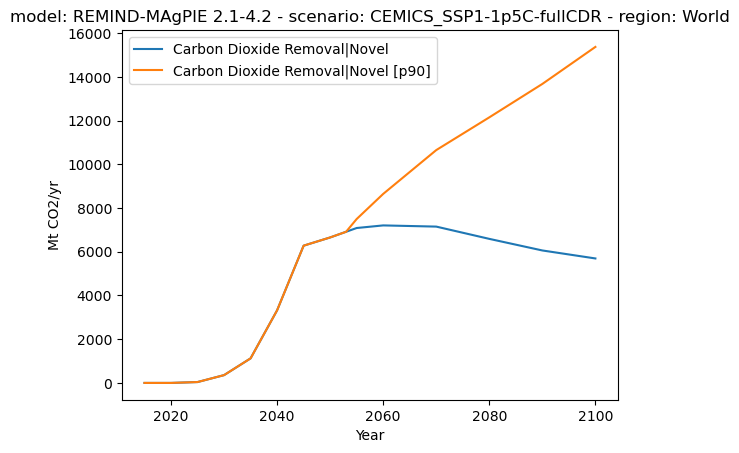

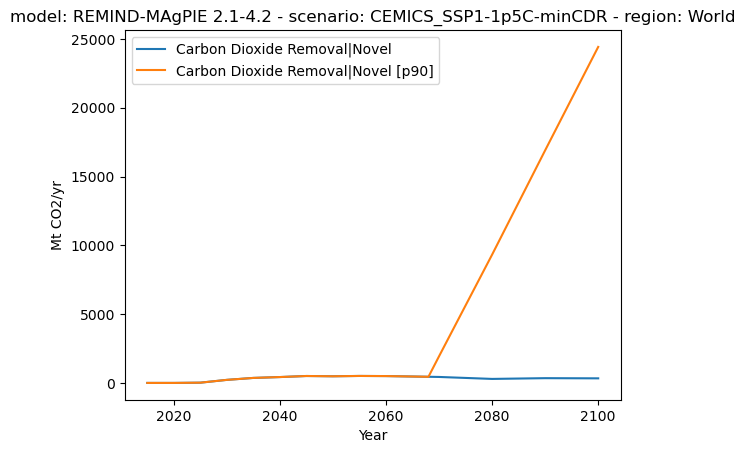

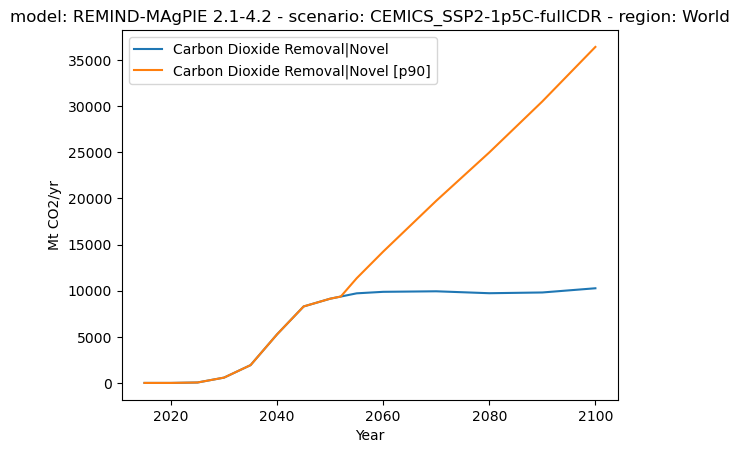

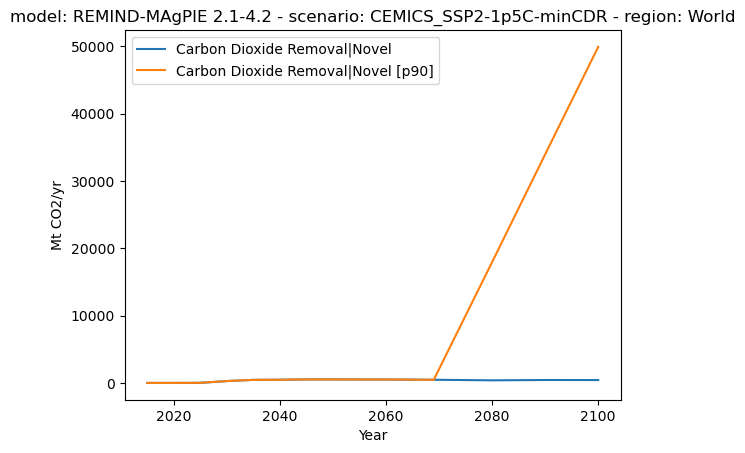

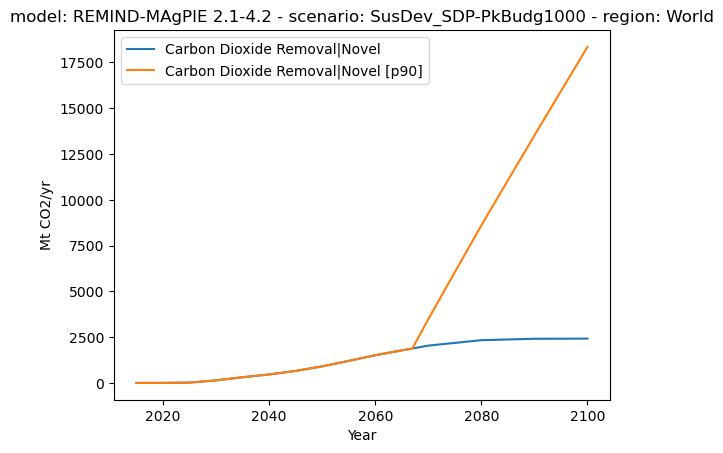

In [26]:
for scenario in compiled_equity_input.scenario:
    compiled_equity_input.filter(
        variable=[
            'Carbon Dioxide Removal|Novel',
            'Carbon Dioxide Removal|Novel [p90]'
        ],
        scenario=scenario,
        region='World'
    ).plot(color='variable')